In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X, y = make_moons(100, noise=0.25,random_state=2)

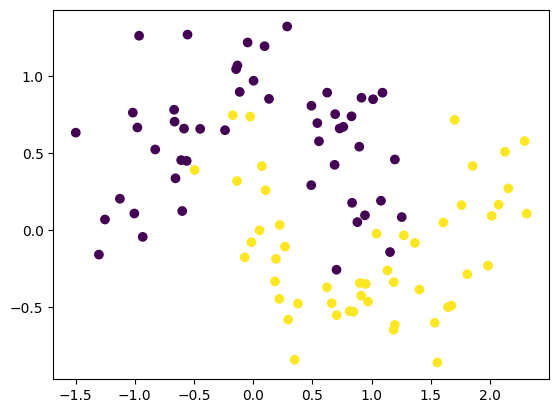

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [8]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 16s 2ms/step


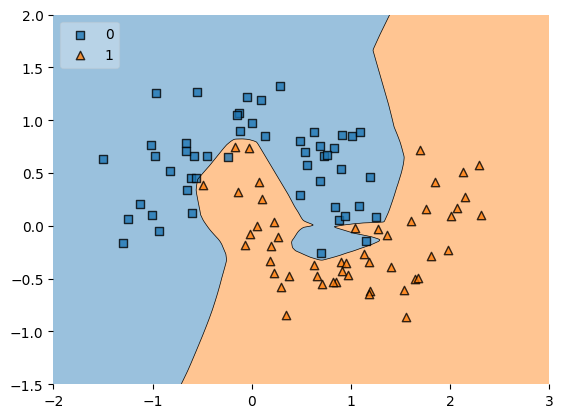

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

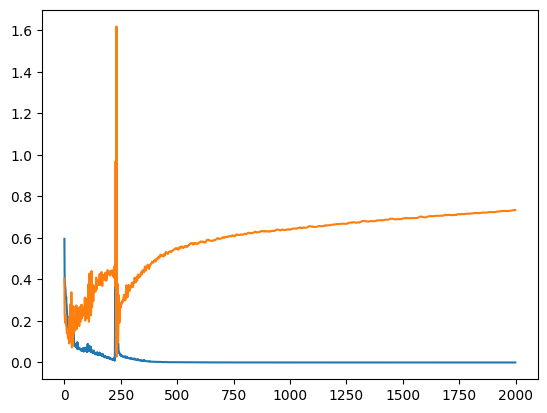

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# Regularization:
I have used L2 regularization

In [17]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 15s 2ms/step


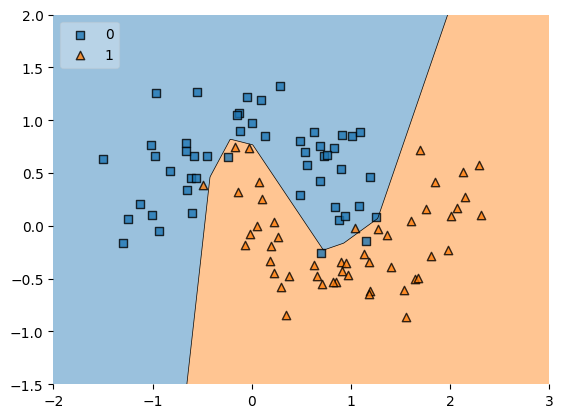

In [19]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

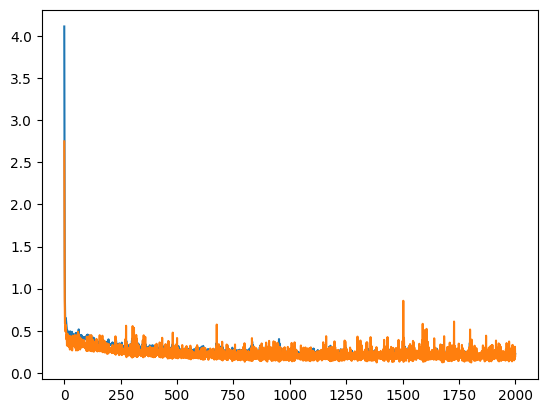

In [20]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [16]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

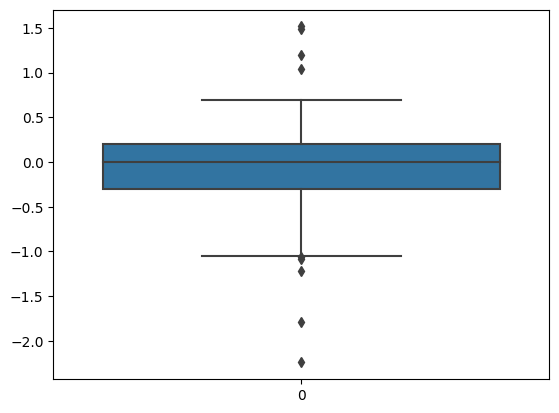

In [21]:
sns.boxplot(model1_weight_layer1)

<Axes: >

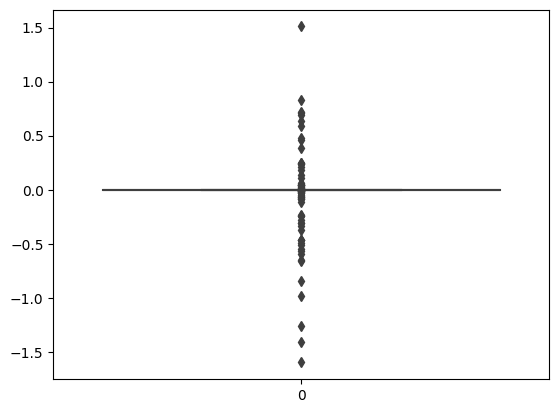

In [22]:
sns.boxplot(model2_weight_layer1)

In [23]:
model1_weight_layer1.min()

-2.2406423

In [24]:
model2_weight_layer1.min()

-1.5980903

<ipython-input-25-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-25-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

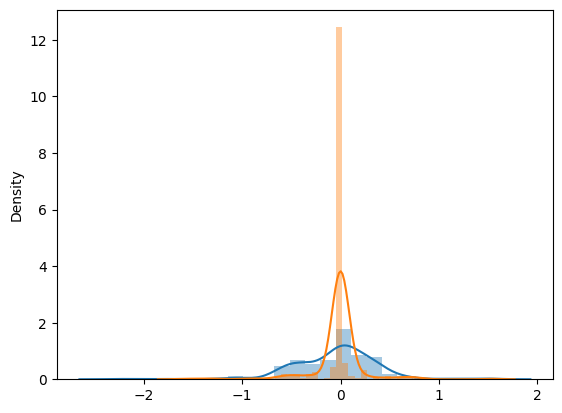

In [25]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [26]:
model1.get_weights()[0].reshape(256)

array([ 2.64222056e-01, -6.07806623e-01, -5.34287691e-02,  3.40927184e-01,
       -5.86952388e-01, -6.10519983e-02, -5.56034088e-01, -1.84363410e-01,
       -5.11284471e-01,  5.82931712e-02,  2.59211272e-01, -2.00994864e-01,
       -3.05869430e-01,  5.59778363e-02, -3.84989381e-01,  8.13493058e-02,
        3.36536244e-02,  7.48731568e-02, -6.24061748e-02,  3.41970623e-01,
        1.36675239e-01, -3.04644316e-01, -8.53701308e-02, -6.45429552e-01,
        8.69897231e-02,  3.46682847e-01,  1.03588514e-01,  2.93390960e-01,
        3.07025045e-01, -5.47877192e-01,  2.37606853e-01,  7.10452422e-02,
       -5.80378234e-01,  3.39127034e-01,  6.76323101e-03,  3.35535616e-01,
        4.11791205e-01, -5.29590487e-01, -4.95878994e-01,  2.76447445e-01,
       -5.84960639e-01, -4.18184809e-02, -3.14314701e-02,  2.04274818e-01,
        8.73732194e-02,  3.79053295e-01, -4.51661944e-01, -1.02166295e-01,
        7.75143504e-02,  1.77413613e-01, -4.73260224e-01,  4.09019679e-01,
       -5.32703161e-01, -